## This notebook aims to conduct the data exploration of Apple's stock price dataset.

### Imports
Firstly, we import the necessary libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Loading the data
First, we have to load the stock price dataset.

In [2]:
csv_filename = '../datasets/stock_data.csv'
df = pd.read_csv(csv_filename)
print(df.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2023-01-03  130.279999  130.899994  124.169998  125.070000  124.048042   
1  2023-01-04  126.889999  128.660004  125.080002  126.360001  125.327507   
2  2023-01-05  127.129997  127.769997  124.760002  125.019997  123.998459   
3  2023-01-06  126.010002  130.289993  124.889999  129.619995  128.560883   
4  2023-01-09  130.470001  133.410004  129.889999  130.149994  129.086533   

      Volume  
0  112117500  
1   89113600  
2   80962700  
3   87754700  
4   70790800  


### Understanding the data structure
Next, we check the structure of the dataset. We can confirm that there are 250 rows and 7 features.

In [3]:
df_shape = df.shape

# Print the shape
print("Number of rows:", df_shape[0])
print("Number of columns:", df_shape[1])

Number of rows: 250
Number of columns: 7


### Identifying missing values
Next, we can identify how many cells have missing values and impute them accordingly. Fortunately, there are no cells with missing values.

In [4]:
# Check for missing values in each cell
missing_values_df = df.isnull()

# Display cells with missing values
print("Cells with missing values:", missing_values_df)

Cells with missing values:       Date   Open   High    Low  Close  Adj Close  Volume
0    False  False  False  False  False      False   False
1    False  False  False  False  False      False   False
2    False  False  False  False  False      False   False
3    False  False  False  False  False      False   False
4    False  False  False  False  False      False   False
..     ...    ...    ...    ...    ...        ...     ...
245  False  False  False  False  False      False   False
246  False  False  False  False  False      False   False
247  False  False  False  False  False      False   False
248  False  False  False  False  False      False   False
249  False  False  False  False  False      False   False

[250 rows x 7 columns]


### Identifying outliers
Next, we can identify outliers for the "Adj Close" feature, which is our target variable, and impute them with the median value. Fortunately, there are no outliers in the dataset.

In [5]:
# Calculate statistics for the "Adj Close" feature
adj_close_stats = df['Adj Close'].describe()

# Define outlier criteria
Q1 = adj_close_stats['25%']
Q3 = adj_close_stats['75%']
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Adj Close'] < lower_bound) | (df['Adj Close'] > upper_bound)]

# Impute outliers (replace with median)
median_adj_close = adj_close_stats['50%']
df.loc[outliers.index, 'Adj Close'] = median_adj_close

# Print the number of outliers and the imputed values
print("Number of outliers detected:", len(outliers))
print("Imputed outliers with median value:", median_adj_close)

Number of outliers detected: 0
Imputed outliers with median value: 174.78372955322266


### Feature Selection
Next, we try to identify features that are highly correlated with the target variable to improve the performance of the model. From the scatterplots and correlation coefficients, we can see that all features, except volume, have a strong linear relationship with the target variable.

Correlation with 'Adj Close':
Adj Close    1.000000
Close        0.999948
Low          0.997977
High         0.997623
Open         0.994693
Volume      -0.321075
Name: Adj Close, dtype: float64
Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


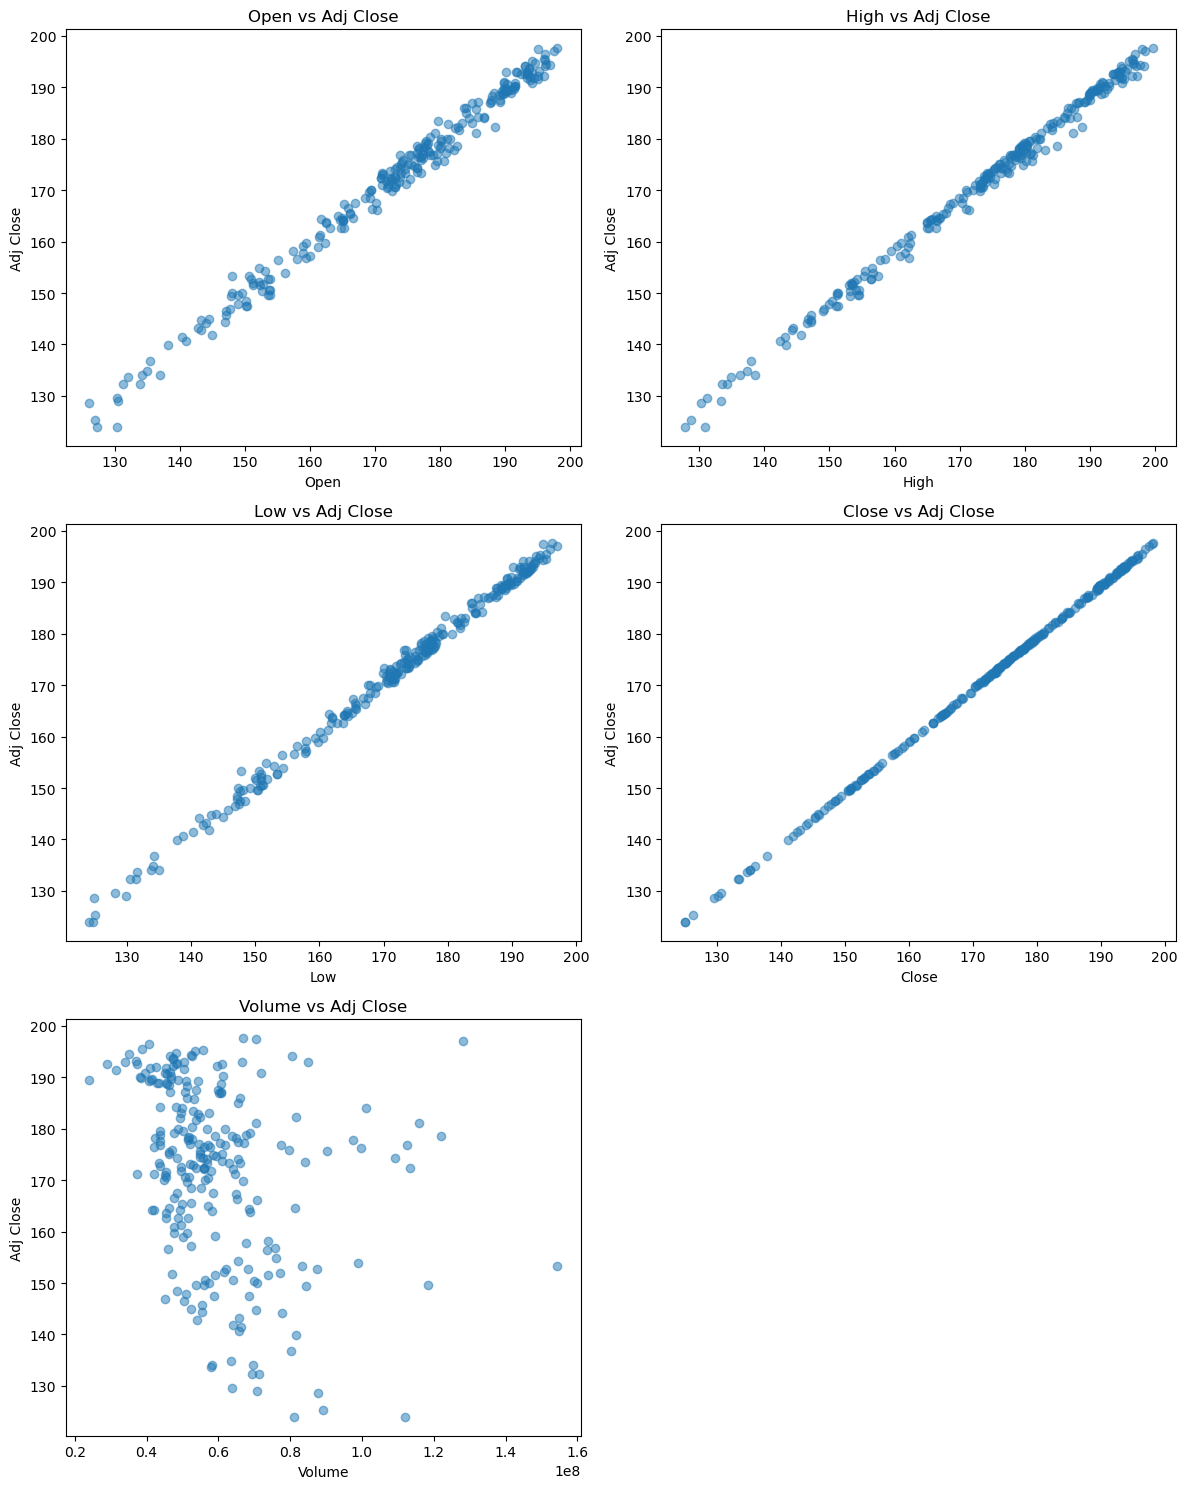

In [6]:
# Calculate Pearson correlation coefficients
df.drop(columns=['Date'], inplace=True)
correlation_matrix = df.corr(numeric_only=False)

# Extract correlations with 'Adj Close'
adj_close_correlation = correlation_matrix['Adj Close']

# Sort correlations in descending order
adj_close_correlation = adj_close_correlation.sort_values(ascending=False)

# Display correlations with 'Adj Close'
print("Correlation with 'Adj Close':")
print(adj_close_correlation)

# Define the features to plot
features_to_plot = df.columns.drop('Adj Close')
print(features_to_plot)

# Set up subplots
num_rows = (len(features_to_plot) + 1) // 2  # Number of rows in subplot grid
fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 5))  # Create subplot grid
axes = axes.flatten()

# Plot each feature against 'Adj Close'
for i, feature in enumerate(features_to_plot):
    ax = axes[i]
    ax.scatter(df[feature], df['Adj Close'], alpha=0.5)
    ax.set_title(f'{feature} vs Adj Close')
    ax.set_xlabel(feature)
    ax.set_ylabel('Adj Close')

# Remove empty subplots
for ax in axes[len(features_to_plot):]:
    ax.remove()

# Adjust layout
plt.tight_layout()
plt.show()